<a href="https://colab.research.google.com/github/MrKome/Store_Sales_Analysis/blob/main/Store_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import numpy as np
from google.colab import files #upload files from computer using files libray
f = files.upload()

Saving Sales_Numpy.csv to Sales_Numpy.csv


In [4]:
# Data Cleaning
# Store file in variable, add a delimiter which seperates each column, skip headers in first row,, define data type, provide column names
data = np.genfromtxt('Sales_Numpy.csv',delimiter=',',skip_header=1,dtype=None,names=['Date','Product','Category','Sales','Advertisment'],encoding='utf-8')

# Create variables and store columns, removing any Null values
sales_data = np.nan_to_num(data['Sales'])
advertisment_data = np.nan_to_num(data['Advertisment'])


In [6]:
# Data Normalisation
# Lets minus the sales data by the mean of sales data, and divide the answer by its standard deviation. Repeat for Advertisment.
sales_norm = (sales_data - np.mean(sales_data))/np.std(sales_data)
advertisment_norm = (advertisment_data - np.mean(advertisment_data))/np.std(advertisment_data)

In [7]:
# Statistical Analysis
sales_mean = np.mean(sales_data)
sales_median = np.median(sales_data)
sale_std = np.std(sales_data)

#Print results
print('Mean Sales: ' + str(sales_mean))
print('Median Sales: ' + str(sales_median))
print('Standard Deviation Sales: ' + str(sale_std))

Mean Sales: 1502.425219941349
Median Sales: 1502.0
Standard Deviation Sales: 294.56138844622535


In [8]:
# Create variable to store all unique products and remove duplications
products = np.unique(data['Product'])
p=[] # Variable created for Looping through unique products and one by one stores them here
s=[] # Variable created to store sum of sales against each product

# Lets loop through the products
for product in products:
  sales = np.sum(data[(data['Product']==product)]['Sales']) # Calculate total sales against current product in the loop, from main table
  p.append(product)# Store the current product in list p
  s.append(sales) # Store sales for this product in list s

#Print lists to verify results
print(p)
print(s)

['Belts', 'Blouses', 'Boots', 'Casual Dresses', 'Coats', 'Evening Gowns', 'Gloves', 'Hats', 'Jackets', 'Jeans', 'Nightgowns', 'Pajamas', 'Pants', 'Scarves', 'Shirts', 'Shoes', 'Skirts', 'Sneakers', 'SportsJerseys', 'Sweaters', 'T-shirts', 'YogaPants']
[45927, 47120, 47878, 44255, 44864, 45440, 46421, 45224, 45729, 46084, 49085, 47898, 48263, 46619, 47860, 45739, 48696, 47754, 46473, 44794, 45972, 46559]


In [10]:
# Calculate sales by category of products
cats = np.unique(data['Category'])
pc=[]
cs=[]

# Lets loop through the Categories
for cat in cats:
  sales = np.sum(data[(data['Category']==cat)]['Sales'])
  pc.append(cat)
  cs.append(sales)

#Print lists to verify results
print(pc)
print(cs)

['Accessories', 'Bottoms', 'Dresses', 'Footwear', 'Outerwear', 'Sleepwear', 'Sportswear', 'Tops']
[184191, 143043, 89695, 141371, 135387, 96983, 93032, 140952]


In [11]:
# Store maximum value from list of sales by products
max_s = np.max(s)
# Create variable to store index of that maximum value
ind_s = s.index(max_s)
# Print name of product with highest sale
print('Product with Highest Sales: ' + str(p[ind_s]))

#Find out category of products with highest sales
max_cs = np.max(cs)
ind_cs = cs.index(max_cs)
print('Category with Highest Sales: ' + str(pc[ind_cs]))



Product with Highest Sales: Nightgowns
Category with Highest Sales: Accessories


In [13]:
# Calculate the average sales
avg = np.average(data['Sales'])
print('Average Sales: ' + str(avg))

# Place a condition based on product column, using the product Nightgowns
avg_Nightgowns = np.average(data[data['Product']=='Nightgowns']['Sales'])
print('Average Nightgowns Sales: ' + str(avg_Nightgowns))

Average Sales: 1502.425219941349
Average Nightgowns Sales: 1583.3870967741937


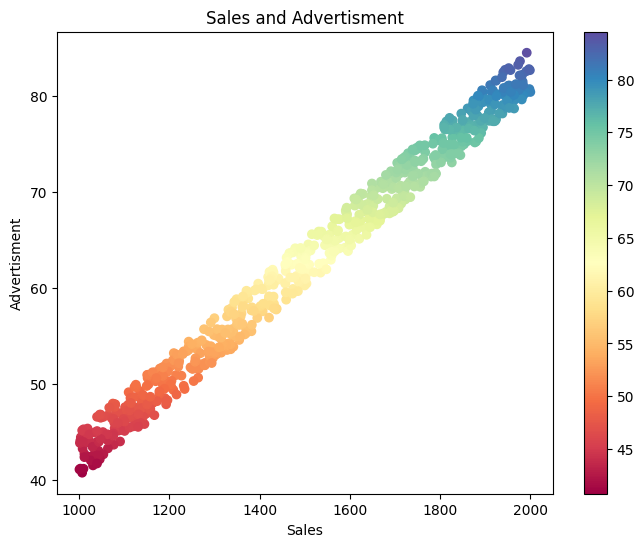

In [47]:
# Import Pyplot lib to create visualisations of our sales analysis
import matplotlib.pyplot as plt
# Plot sales and advertisment data on scatter chart
x = data['Sales'] # Store sales data in variable x
y = data['Advertisment'] # Store Advertisment data in variable y
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(x,y, c=y, cmap='Spectral') # Create scatter chart using x and y variables
plt.colorbar()
plt.title('Sales and Advertisment')
plt.xlabel('Sales')
plt.ylabel('Advertisment')
plt.show()

# The data will show the overall relationship between sales and advertisment expenses - Which seems to be positive

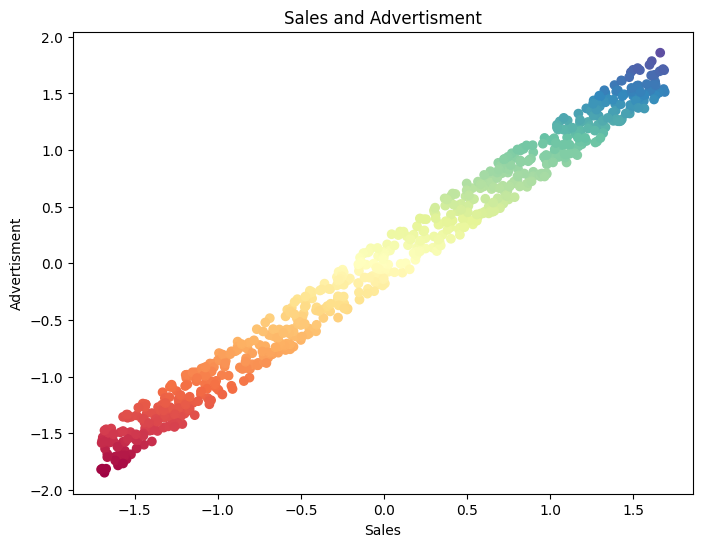

In [46]:
# Create another scatter chart using normalised data to perform sales analysis
plt.scatter(sales_norm,advertisment_norm, c=y, cmap='Spectral')
plt.title('Sales and Advertisment')
plt.xlabel('Sales')
plt.ylabel('Advertisment')
plt.show()



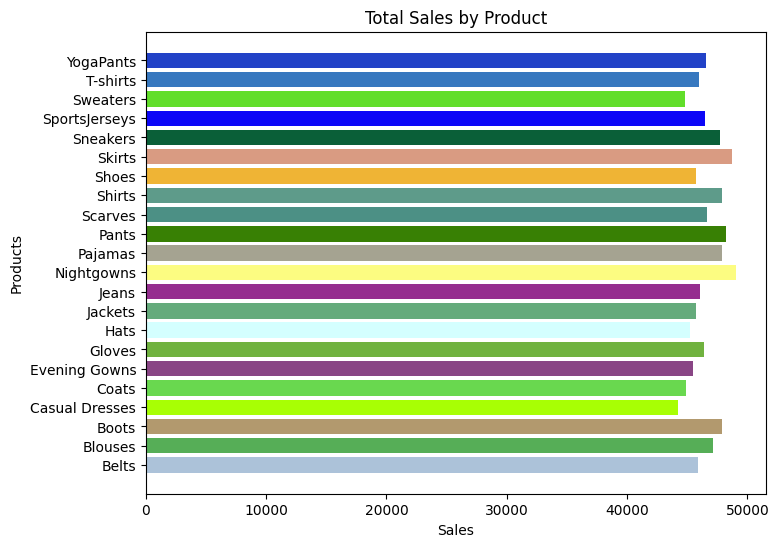

In [45]:
# Create horizontal bar chart using sales and product variables to display the total sales by product for the month
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
plt.barh(p,s, color=colors_list)
plt.title('Total Sales by Product')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()

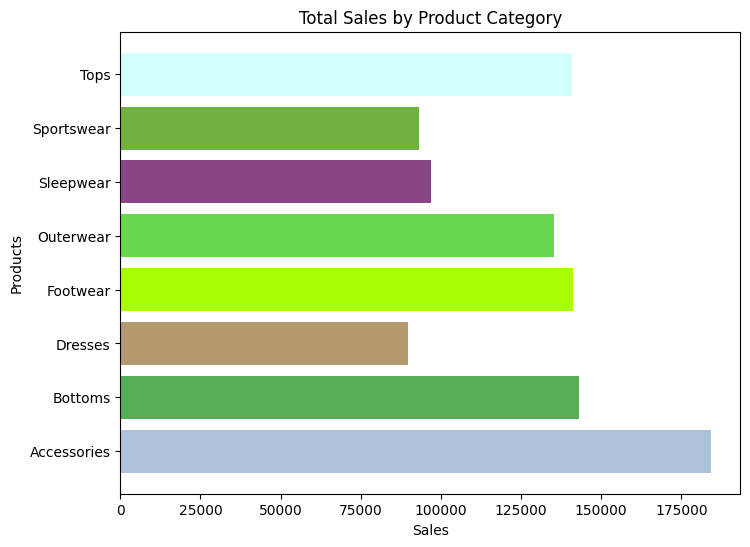

In [44]:
# Create chart to display the total sales by product category for the month
plt.barh(pc,cs, color=colors_list)
plt.title('Total Sales by Product Category')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()